In [17]:
#Iris data set 

#imprting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
#importing the dataset
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
print ("Train data: \n")
print ("Number of columns: " + str (iris.shape[1]))
print ("number of rows: " + str (iris.shape[0]))

Train data: 

Number of columns: 6
number of rows: 150


In [25]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


Text(0.5, 1.0, 'scatter')

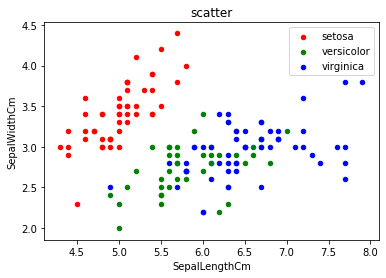

In [27]:
# scatter plot using pandas

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

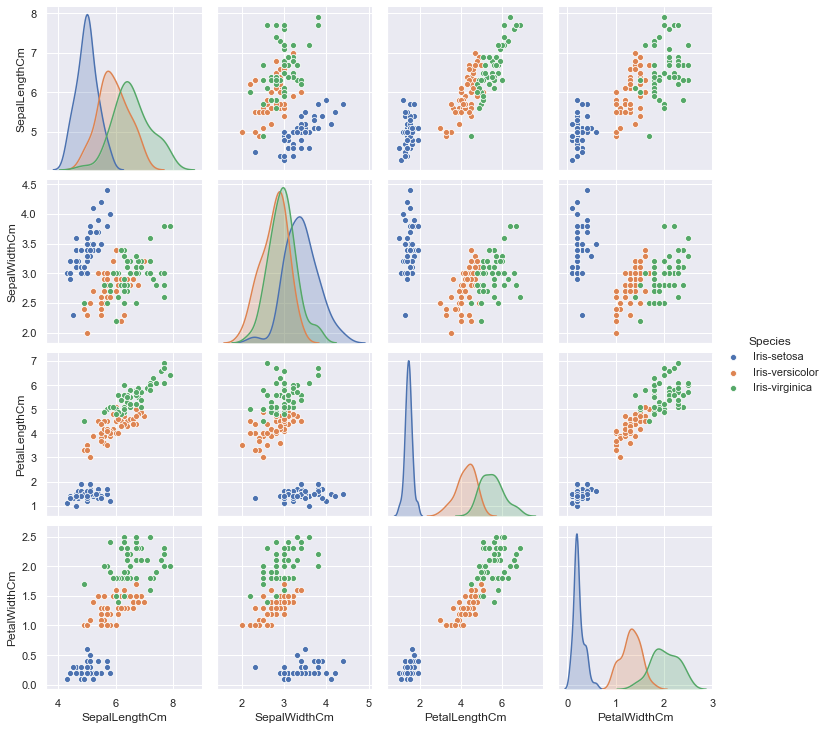

In [29]:
# Paired plot using seaborn
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

In [67]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [36]:
#splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

print ("shape of x_train: " + str (x_train.shape))
print ("shape of x_test: " + str (x_test.shape))
print ("shape of y_train: " + str (y_train.shape))
print ("shape of y_test: " + str (y_test.shape))

shape of x_train: (112, 4)
shape of x_test: (38, 4)
shape of y_train: (112,)
shape of y_test: (38,)


## Logistic Regression

Definition: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train,y_train)

print('linear regression parameters: ',clf.coef_ )
print('linear regression score on train: ', clf.score(x_train, y_train))
print('linear regression score on test: ', clf.score(x_test, y_test))

linear regression parameters:  [[-1.01465338  1.04659554 -1.75284164 -1.64627151]
 [ 0.54202386 -0.35704964 -0.2810007  -0.71387217]
 [ 0.47262952 -0.6895459   2.03384234  2.36014368]]
linear regression score on train:  0.9732142857142857
linear regression score on test:  0.9736842105263158


In [38]:
clf_pred = clf.predict(x_test)
clf_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [52]:
print(confusion_matrix(y_test, clf_pred,labels=np.unique(y_train)))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [51]:
print(classification_report(y_test,clf_pred, target_names=np.unique(y_train)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## 2.2 Naïve Bayes
Definition: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

Advantages: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

Disadvantages: Naive Bayes is is known to be a bad estimator.

In [55]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)

print('linear regression score on train: ', clf.score(x_train, y_train))
print('linear regression score on test: ', clf.score(x_test, y_test))

linear regression score on train:  0.9464285714285714
linear regression score on test:  1.0


In [56]:
clf_pred = clf.predict(x_test)
clf_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype='<U15')

In [57]:
print('classification_report:\n',classification_report(y_test,clf_pred, target_names=np.unique(y_train)))
print('confusion_matrix:\n',confusion_matrix(y_test, clf_pred,labels=np.unique(y_train)))

classification_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

confusion_matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


## 2.3 Stochastic Gradient Descent
Definition: Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

Advantages: Efficiency and ease of implementation.

Disadvantages: Requires a number of hyper-parameters and it is sensitive to feature scaling.

In [59]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(x_train,y_train)

print('linear regression parameters: ',clf.coef_ )
print('linear regression score on train: ', clf.score(x_train, y_train))
print('linear regression score on test: ', clf.score(x_test, y_test))

linear regression parameters:  [[ -5.14210256   8.48780366 -12.57020161 -14.01985083]
 [ -1.51080085   1.91934153   9.73079052  -5.88719513]
 [ -1.61228124  -6.44723536  39.68940459  29.9611993 ]]
linear regression score on train:  0.9375
linear regression score on test:  0.8947368421052632


In [87]:
clf_pred = clf.predict(x_test)
clf_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [88]:
print('classification_report:\n',classification_report(y_test,clf_pred, target_names=np.unique(y_train)))
print('confusion_matrix:\n',confusion_matrix(y_test, clf_pred,labels=np.unique(y_train)))

classification_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

confusion_matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## 2.5 Decision Tree
Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [77]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

print('linear regression score on train: ', clf.score(x_train, y_train))
print('linear regression score on test: ', clf.score(x_test, y_test))

linear regression score on train:  1.0
linear regression score on test:  0.9736842105263158


In [89]:
clf_pred = clf.predict(x_test)
clf_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [91]:
print('classification_report:\n',classification_report(y_test,clf_pred, target_names=np.unique(y_train)))
print('confusion_matrix:\n',confusion_matrix(y_test, clf_pred,labels=np.unique(y_train)))

classification_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

confusion_matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


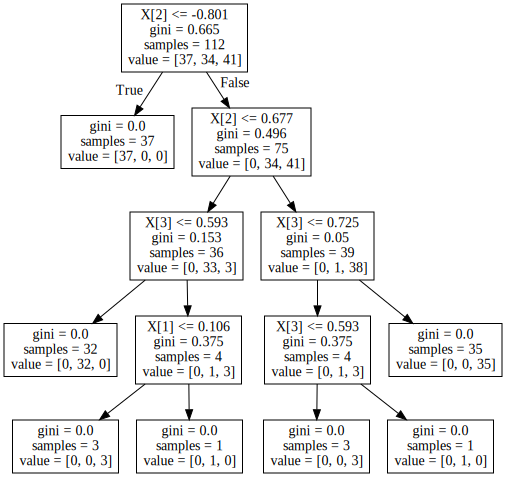

In [92]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph

In [99]:
r = tree.export_text(clf, feature_names=['sepal length (cm)','sepal width (cm)',
                                         'petal length (cm)','petal width (cm)'])
print(r)

|--- petal length (cm) <= -0.80
|   |--- class: Iris-setosa
|--- petal length (cm) >  -0.80
|   |--- petal length (cm) <= 0.68
|   |   |--- petal width (cm) <= 0.59
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal width (cm) >  0.59
|   |   |   |--- sepal width (cm) <= 0.11
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- sepal width (cm) >  0.11
|   |   |   |   |--- class: Iris-versicolor
|   |--- petal length (cm) >  0.68
|   |   |--- petal width (cm) <= 0.72
|   |   |   |--- petal width (cm) <= 0.59
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- petal width (cm) >  0.59
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- petal width (cm) >  0.72
|   |   |   |--- class: Iris-virginica



## 2.6 Random Forest
Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.



In [100]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(x_train,y_train)

print('linear regression score on train: ', clf.score(x_train, y_train))
print('linear regression score on test: ', clf.score(x_test, y_test))

linear regression score on train:  1.0
linear regression score on test:  0.9736842105263158
